# Seção 12: Medindo o risco de um investimento

### Aula 69: como medir o risco de um ativo

Suponha que você invista o capital de 1.000,00 dólares em uma ação que, em **média**, valorizou 15%. Como é média, seria interessante sabermos como foi o comportamento deste ativo em cada ano. Se os dados dispersaram muito da média (+50, -20, -20, +50) ou se estiveram em volta dela (+14, +16, +13, +17).

Dito isso, concluimos que **volatilidade (variabilidade)** é uma variável importante para a análise.

As medidas estatísticas, como variância e desvio padrão, podem ajudar a quantificar o risco envolvido.

A variância $S^{2}$ mede **a dispersão de um conj. de pontos de dados em torno da média**.

$$ S^{2} = \frac {\Sigma {(X - X'^{2})}} {N - 1} $$

em que $X'$ é a **média**.

Já o desvio padrão é medido:

$$ S =  \sqrt {S^{2}} $$

### Aula 70: medindo o risco de um ativo em Python

In [1]:
# Import libs
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

#### Utilizando a Procters & Gamble (PG) e a BEIERSDORF (BEI.DE)

In [2]:
tickers = ['PG', 'BEI.DE']

sec_data = pd.DataFrame()

for t in tickers:
    sec_data[t] = web.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [3]:
# O desvio padrao dos retornos da empresa também podem ser chamados de
# riscos ou volatilidade
sec_returns = np.log(sec_data / sec_data.shift(1))

sec_returns

,PG,BEI.DE
Date,,
2007-01-03,NaN,NaN
2007-01-04,-0.007621,0.006544
2007-01-05,-0.008624,-0.020772
2007-01-08,0.002202,0.000202
2007-01-09,-0.002517,-0.022858
...,...,...
2021-04-19,-0.004674,0.006317
2021-04-20,0.008310,-0.013335
2021-04-21,-0.006555,0.008110


#### PG

In [4]:
# Retorno medio diario
sec_returns['PG'].mean()

0.00032132272902340363

In [5]:
# Retorno medio anualizado
sec_returns['PG'].mean() * 250

0.08033068225585091

In [6]:
# Desvio padrao, risco ou volatilidade da PG
sec_returns['PG'].std()

0.01184883020246616

In [7]:
# Toda vez que anualizarmos o desvio padrao precisamos tirar
# a raiz quadrada de 250
sec_returns['PG'].std() * 250 ** 0.5

0.18734645524193555

#### BEI.DE

In [8]:
sec_returns['BEI.DE'].mean() * 250

# Desvio padrao
sec_returns['BEI.DE'].std()

# Desvio padrao anualizado
sec_returns['BEI.DE'].std() * 250 ** 0.5

0.21885046308035114

#### As duas, comparando-as.

In [9]:
print(f"Retorno médio anual da PG: {sec_returns['PG'].mean() * 250}")

print(f"Retorno médio anual da BEI.DE: {sec_returns['BEI.DE'].mean() * 250}")

Retorno médio anual da PG: 0.08033068225585091
Retorno médio anual da BEI.DE: 0.05218276567655324


In [10]:
# Fazendo oq foi feito só q de forma mais prática
sec_returns[['PG', 'BEI.DE']].mean() * 250

PG        0.080331
BEI.DE    0.052183
dtype: float64

In [11]:
sec_returns[['PG', 'BEI.DE']].std() * 250 ** 0.5

PG        0.187346
BEI.DE    0.218850
dtype: float64

### Aula 71: as vantagens da diversificação de um portfólio

- É melhor investir em presas que operam em segmentos diferentes

- Existe uma relação entre os preços das empresas.

**O coeficiente de correlação mede a relação (força e direção) entre duas variáveis**, dado pela seguinte fórmula:

$$ \rho_{xy} = \frac {(x - x') * (y - y')} {\sigma_{x} \sigma_{y}} $$

em que $\rho_{xy}$ é o coeficiente de correlação, $x'$ e $y'$ são as médias de cada variável.

A **interpretação por de trás de $\rho_{xy}$**:

- $\rho_{xy} > 0 \rightarrow $ as duas variáveis têm comportamentos semelhantes, ou seja, as duas aumentam (ou diminuem) simultaneamente (não de forma proporcional, necessariamente);

- $\rho_{xy} < 0 \rightarrow $ as duas variáveis possuem comportamentos opostos. Enquanto uma caminha para uma direção, a outra segue direção contrária.

- $\rho_{xy} = 0 \rightarrow $ as duas variáveis são **independentes**.

Sendo assim, podemos dizer que a covariância mostra uma **tendência na relação linear entre as variáveis e a força dessa relação entre elas**.

**Correlação negativa:**

Correlação = -1 $\rightarrow$ correlação perfeitamente negativa

Correlação entre -1 e 0 $\rightarrow$ correlação negativa imperfeita.

**Correlação positiva:**

Correlação = 1 $\rightarrow$ correlação perfeitamente positiva

Correlação entre 0 e 1 $\rightarrow$ correlação positiva imperfeita

### Aula 73: calculando covariância e a correlação usando Python

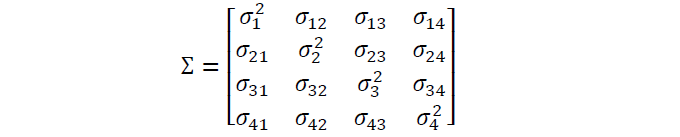

In [12]:
# variancia procter & gamble
v_pg = sec_returns['PG'].var()
v_pg

# variancia beider.de
v_bd = sec_returns['BEI.DE'].var()
v_bd

# anualizando
v_pg = sec_returns['BEI.DE'].var() * 250
v_bd = sec_returns['PG'].var() * 250

In [13]:
# covariancia PG
# nao precisa analisar para PG e BEI.DE, pois
# o resultado eh um numero escalar
cov_matrix = sec_returns.cov()

# covariancia anual
cov_matrix_a = sec_returns.cov() * 250

cov_matrix_a

,PG,BEI.DE
PG,0.035099,0.011097
BEI.DE,0.011097,0.047896


In [14]:
# calculando a correlacao
corr_matrix = sec_returns.corr()
corr_matrix

,PG,BEI.DE
PG,1.000000,0.270274
BEI.DE,0.270274,1.000000


A correlação acima não é a correlação dos PREÇOS e sim dos **RETORNOS**.

Fórmula da correlação: $$ \frac {cov(x,x)} {s(x) * s(x)} = \frac {var(x)} {var(x)} $$

### Aula 75: considerando o risco de múltiplos ativos em um portfólio

**Portfólio de ações:** carteira que tem pelo menos duas ações.

Supondo que um portfólio tenha apenas duas ações, então o risco dessa carteira será dada por uma função dos seus pesos e variâncias.

A **variância de um portfólio de ações** é dada por:

$$ {(w_{1} \sigma_{1} + w_{2} \sigma_{2})}^2 = w_{1}^2 \sigma_{1}^2 + 2w_{1}\sigma_{1}w_{2}\sigma_{2} \rho_{12} + w_{2}^2 \sigma_{2}^2$$

em que:

$w_{1} + w_{2} = 1 $;

$\rho_{1}:$ variância do retorno dos dois ativos;

$w_{1}, w_{2}:$ peso do ativo 1, peso do ativo 2;

$\sigma_{1}, \sigma_{2}:$ variância do ativo 1, variância do ativo 2;

### Aula 76: calculando o risco de um portfólio

In [15]:
"""
Ativos: PG, BEI.DE
Fonte de dados: yahoo
Início: 2007-1-1
"""
pesos = np.array([0.5, 0.5])

A variável `pesos` deve ser uma matriz. Lembrando das aulas de Álgebra Linear, para calcularmos matrizes e obtermos um número escalar, precisamos da matriz transposta. Veja abaixo como fica:

$$ (a.b)^2 = a^{2}b^{2}
\rightarrow (aB)^2 = a^{T}Ba
$$

Em `Python`, podemos utilizar o `np.dot()`.

In [22]:
# Variancia do portfolio
var_portfolio = np.dot(pesos.T, np.dot(sec_returns.cov() * 250, pesos))
var_portfolio

# Vol portfolio
vol_portfolio = (np.dot(pesos.T, np.dot(sec_returns.cov() * 250, pesos))) ** 0.5
print(f"Variância do portfólio: {str(round(var_portfolio, 5) * 100)}%\nVolatilidade do portfólio: {str(round(vol_portfolio, 5) * 100)}%")

Variância do portfólio: 2.63%
Volatilidade do portfólio: 16.216%


### Aula 77: entendendo o risco sistemático (diversificável) e o risco idiossincrático (não-diversificável)

**Risco sistemático:** risco que não pode ser diversificado. Exemplos: recessão econômica, redução dos gastos, guerras, desastres naturais. Ou seja, tudo que não pode ser controlado pelo homem.

**Risco não-diversificável, idiossincrático, não-sistemático:** risco que pode ser controlado pelo investidor, como a diversificação.

### Aula 78: risco diversificável e não-diversificável de um portfólio em python

In [23]:
pesos = np.array([0.5, 0.5])

In [25]:
pesos[0]

0.5

In [26]:
pesos[1]

0.5

#### Risco Diversificável

$$ risco diversificavel = variancia do portfolio - variancia anual ponderada $$

In [27]:
# Variancia anual ponderada para PG
PG_var_a = sec_returns[['PG']].var() * 250
PG_var_a

PG    0.035099
dtype: float64

In [28]:
# Variancia anual ponderada para BEI.DE
BEI_var_a = sec_returns[['BEI.DE']].var() * 250
BEI_var_a

BEI.DE    0.047896
dtype: float64

In [29]:
risco_diversificavel = var_portfolio - (pesos[0] ** 2 * PG_var_a) - (pesos[1] ** 2 * BEI_var_a)

print(risco_diversificavel)

BEI.DE   NaN
PG       NaN
dtype: float64


#### Risco não-diversificável

In [31]:
risco_n_diversificavel = var_portfolio - risco_diversificavel

In [32]:
risco_n_diversificavel

BEI.DE   NaN
PG       NaN
dtype: float64